# IMT 3860: Análisis Exploratorio de Datos (EDA).

**Fecha de entrega: viernes 20 de mayo de 2022, 23:59 hrs., enviar Notebook via Canvas.**


## 1. Introducción.

El dataset de enfermedades cardíacas UCI es un conjunto de datos usado amplimente para estudiar y entrenar modelos para predecir la presencia de patologías cardíacas a partir de un conjunto de atributos de los pacientes, y resultados de ciertos exámenes médicos. La base de datos completa contiene 76 atributos, pero típicamente se utiliza un subconjunto de 14 de ellos. La base de datos descargable y la descripción completa del conjunto de datos están en el siguiente link: 

https://archive.ics.uci.edu/ml/datasets/heart+disease

**nota: Use el de Cleveland**

## 2. Trabajo Individual.

En este ejercicio, trabajaremos con datos relativos a pacientes cardiológicos y sus enfermedades, y aplicaremos un análisis exploratorio para responder algunas preguntas relevantes para la práctica médica. 


A partir de los datos entregados y utilizando sólo herramientas gráficas y estadísticas descriptivas, analize y responda las siguientes preguntas:

1. ¿A qué edad las personas se preocupan por realizarse exámenes cardiológicos?
2. ¿Hay diferencias entre la demanda de exámenes entre hombres y mujeres?
3. ¿Qué variables cardiológicas se ven más afectadas por la edad?
4. ¿Qué variables muestran mayor correlación?
5. ¿Qué variables son determinantes para predecir patologías cardíacas?

**Justifique gráfica y/o cuantitativamente todas sus respuestas**.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('/content/drive/MyDrive/MIA/IMT3860 - Introducción a Data Science/taller 3/processed.cleveland.data', sep=',', names=cols)
df[['ca','thal']]=df[['ca','thal']].apply(lambda x:pd.to_numeric(x,errors='coerce'),axis=1)

##Significados de los atributos de la tabla

Solo 14 atributos son usados en la tabla:
1. age: edad en años
2. sex: sexo (1 = hombre; 0 = mujer)
3. cp: tipo de dolor en el pecho 'chest pain' (1=angina típica;2=angina atípica;3=dolor no anginoso;4=asintomático)
4. trestbps: presión arterial en reposo (en mm Hg al ingreso en el hospital)
5. chol: colesterol sérico en mg/dl
6. fbs: glicemia en ayunas 'fasting blood sugar' > 120 mg/dl (1=verdadero;0=falso)
7. restecg: resultados electrocardiográficos en reposo (0=normal;1=tener anomalía en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV);2=mostrar hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes)
8. thalach: frecuencia cardíaca máxima alcanzada
9. exang: angina inducida por el ejercicio (1 = si; 0 = no)
10. oldpeak: depresión del ST inducida por el ejercicio en relación con el reposo
11. slope:la pendiente del segmento ST de ejercicio máximo
12. ca: número de vasos principales (0-3) coloreados por fluoroscopia
13. thal: 3 = normales; 6 = defecto fijo; 7 = defecto reversible
14. num: diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)(0=x< 50% estrechamiento del diámetro;1=x>50% estrechamiento del diámetro)

In [3]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


1. ¿A qué edad las personas se preocupan por realizarse exámenes cardiológicos?
* __Respuesta__: Como se puede ver en el resumen de la tabla (la descripcion) siguente, en promedio la gente hace el examen a la edad de 54 años, pero la mediana esta en 56 años, sobre el 25% de la data esta sobre los 48 años, aun que hay una persona que se tomo el examen a los 29 años.  




In [7]:
data_table.DataTable(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


2. ¿Hay diferencias entre la demanda de exámenes entre hombres y mujeres?
* __Respuesta:__ Como se puede ver en las 2 tablas resumen dividida por sexo siguientes, la demanda de examen es mayor en hombres que en mujeres, las catidades son de 206 y 96 respectivamente.

#Tabla resumen de Hombres


In [8]:
#Tabla resumen de Hombres
data_table.DataTable(df.query('sex==1').describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,202.000000,205.000000,206.000000
mean,53.834951,1.0,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.120874,1.616505,0.732673,5.239024,1.126214
std,8.836838,0.0,1.003381,16.691524,42.649757,0.367680,0.999988,24.131048,0.484987,1.174901,0.627437,0.960836,1.926706,1.266296
min,29.000000,1.0,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.0,3.000000,120.000000,208.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.500000,1.0,4.000000,130.000000,235.000000,0.000000,1.500000,150.500000,0.000000,0.800000,2.000000,0.000000,6.000000,1.000000
75%,59.750000,1.0,4.000000,140.000000,268.500000,0.000000,2.000000,167.500000,1.000000,1.800000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.0,4.000000,192.000000,353.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000,4.000000


#Tabla resumen de Mujeres


In [9]:
#Tabla resumen de Mujeres
data_table.DataTable(df.query('sex==0').describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,97.000000
mean,55.721649,0.0,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,0.867010,1.567010,0.546392,3.656250,0.536082
std,9.370546,0.0,0.865901,19.376149,64.900891,0.330962,0.988660,19.968467,0.420940,1.117542,0.593493,0.878216,1.478464,1.041452
min,34.000000,0.0,1.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,50.000000,0.0,3.000000,120.000000,215.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,57.000000,0.0,3.000000,132.000000,254.000000,0.000000,0.000000,157.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,63.000000,0.0,4.000000,140.000000,302.000000,0.000000,2.000000,165.000000,0.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,76.000000,0.0,4.000000,200.000000,564.000000,1.000000,2.000000,192.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


3. ¿Qué variables cardiológicas se ven más afectadas por la edad?
* __Respuesta:__ Como se pueden ver en la tabla siguiente. Para los casos donde la glicemia es alta, resultados electrocardiográficos en reposo no son normales o la variable thal no es normal, se puede apreciar que las variables cardiologicas que más son afectadas segun una desviacion estandart relativa __DER%__ (para poder medir de igual manera todas las variables) estan ordenada de mayor a menor afetación: 
  1. número de vasos principales (ca)
  2. depresión del ST inducida por el ejercicio en relación con el reposo (oldpeak)
  3. colesterol sérico (chol)
  4. angina inducida por el ejercicio (exang)
  5. diagnóstico de enfermedad cardíaca (num)
  6. presión arterial en reposo (trestbps)
  7. frecuencia cardíaca máxima alcanzada (thalach)
  8. la pendiente del segmento ST de ejercicio máximo (slope)
  9. tipo de dolor en el pecho (cp)

Por lo que podemos conluir que las 3 principales variables cariologicas son _ca_, _oldpeak_ y _chol_.

In [41]:
A=df.loc[(df.restecg>0)|(df.fbs>0)|(df.thal!=3)].describe()-df.describe()
A.drop(index=['count'],columns=['age','sex','restecg','fbs','thal'],inplace=True)
u=A.loc['std'].abs()*100/A.loc['mean'].abs()
A.loc['DER%']=u
data_table.DataTable(A[u.sort_values(ascending=False).index])

,ca,oldpeak,chol,exang,num,trestbps,thalach,slope,cp
mean,0.121481,0.150174,3.258042,0.073267,0.267151,1.319120,-3.540594,0.088229,0.108251
std,0.050122,0.057469,1.042116,0.021196,0.071525,0.140438,0.278406,-0.003044,0.003498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.500000,0.000000,0.000000
50%,0.000000,0.200000,5.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,1.000000
75%,0.000000,0.300000,7.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DER%,41.259212,38.268558,31.985954,28.929387,26.773412,10.646376,7.863254,3.450378,3.231846


4. ¿Qué variables muestran mayor correlación?
* __Respuesta:__

Text(0.5, 1.0, 'Grafico de Correlacion')

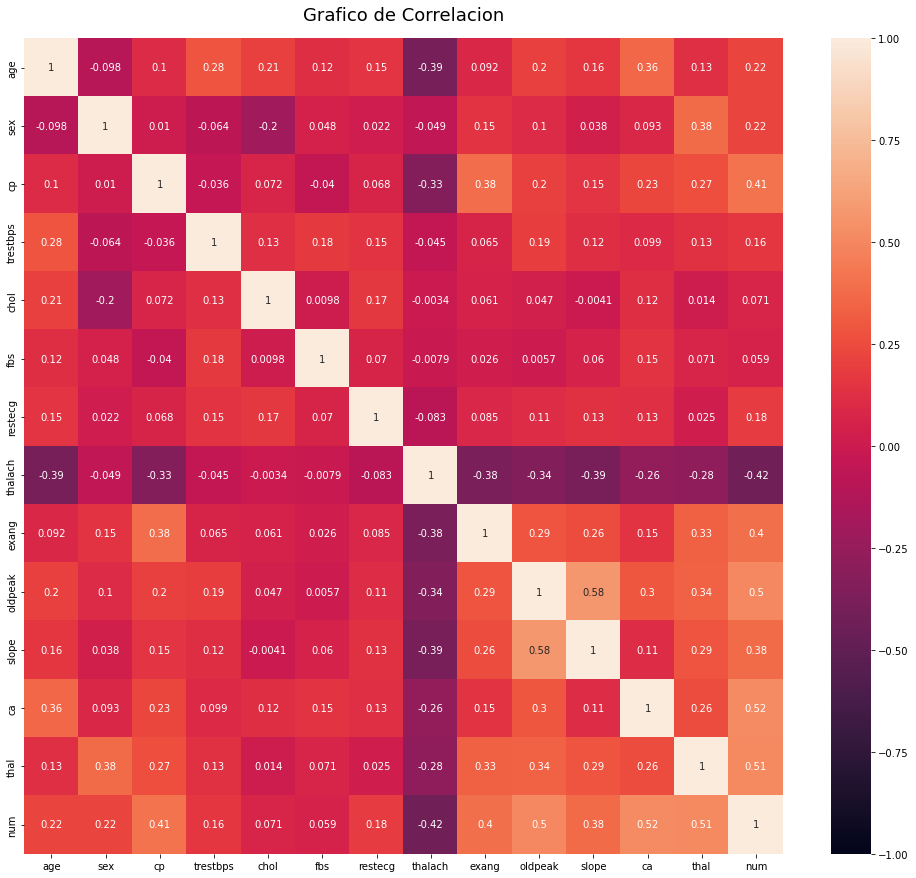

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
f, heatmap = plt.subplots(figsize=(17,15))
heatmap=sns.heatmap(corr,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Grafico de Correlacion', fontdict={'fontsize':18}, pad=18)

In [67]:
B=corr.abs()>=.75
for k in B.columns:
  li=B.loc[B[k]==True].drop(index=[k]).index.tolist()
  if li:
    print(k,': Tiene correlacion alta (>=75%) con ',','.join(li))
  else:
    print(k,': No tiene correlacion alta (>=75%) con ninguna otra variable')

age : No tiene correlacion alta (>=75%) con ninguna otra variable
sex : No tiene correlacion alta (>=75%) con ninguna otra variable
cp : No tiene correlacion alta (>=75%) con ninguna otra variable
trestbps : No tiene correlacion alta (>=75%) con ninguna otra variable
chol : No tiene correlacion alta (>=75%) con ninguna otra variable
fbs : No tiene correlacion alta (>=75%) con ninguna otra variable
restecg : No tiene correlacion alta (>=75%) con ninguna otra variable
thalach : No tiene correlacion alta (>=75%) con ninguna otra variable
exang : No tiene correlacion alta (>=75%) con ninguna otra variable
oldpeak : No tiene correlacion alta (>=75%) con ninguna otra variable
slope : No tiene correlacion alta (>=75%) con ninguna otra variable
ca : No tiene correlacion alta (>=75%) con ninguna otra variable
thal : No tiene correlacion alta (>=75%) con ninguna otra variable
num : No tiene correlacion alta (>=75%) con ninguna otra variable


Como se puede ver en el heatmap ademas de la lista anterior, ninguno tiene una correlacion fuerte (>=75%), pero si relajamos la correlacion a un 50%, podemos obtener que:

In [68]:
B=corr.abs()>=.5
for k in B.columns:
  li=B.loc[B[k]==True].drop(index=[k]).index.tolist()
  if li:
    print(k,': Tiene correlacion (>=50%) con ',','.join(li))
  else:
    print(k,': No tiene correlacion (>=50%) con ninguna otra variable')

age : No tiene correlacion (>=50%) con ninguna otra variable
sex : No tiene correlacion (>=50%) con ninguna otra variable
cp : No tiene correlacion (>=50%) con ninguna otra variable
trestbps : No tiene correlacion (>=50%) con ninguna otra variable
chol : No tiene correlacion (>=50%) con ninguna otra variable
fbs : No tiene correlacion (>=50%) con ninguna otra variable
restecg : No tiene correlacion (>=50%) con ninguna otra variable
thalach : No tiene correlacion (>=50%) con ninguna otra variable
exang : No tiene correlacion (>=50%) con ninguna otra variable
oldpeak : Tiene correlacion (>=50%) con  slope,num
slope : Tiene correlacion (>=50%) con  oldpeak
ca : Tiene correlacion (>=50%) con  num
thal : Tiene correlacion (>=50%) con  num
num : Tiene correlacion (>=50%) con  oldpeak,ca,thal


Coimo se ve en el codigo anterior oldpeak tiene una correlacion debil con slope y num, ca con num, thal con num.

5. ¿Qué variables son determinantes para predecir patologías cardíacas?
*__Respuesta:__ Como se puede ver de la pregunta anerior, donde num, corresponde al diagnóstico de enfermedad cardíaca, se puede aprecia que tiene una correlacion con depresión del ST inducida por el ejercicio en relación con el reposo (oldpeak), número de vasos principales (0-3) coloreados por fluoroscopia (ca) y thal.

In [77]:
from sklearn.linear_model import LogisticRegression
df1=df.dropna()
X=df1[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values
y=df1['num'].values.reshape(-1,1)
log_reg = LogisticRegression()
clf=log_reg.fit(X, y)
clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6094276094276094

In [88]:
A=pd.DataFrame(clf.coef_,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']).rename_axis("num")
data_table.DataTable(A)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,0.016540,-0.101209,-0.209860,-0.004570,-0.001780,0.009431,-0.080250,0.036142,-0.092379,-0.214599,-0.074273,-0.240339,-0.529328
1,-0.012123,0.044215,0.025589,-0.000885,0.000057,-0.030968,0.032066,0.005854,0.021609,-0.051856,-0.010488,-0.004647,0.082470
2,-0.004876,0.023905,0.071805,-0.002791,0.004256,0.015478,-0.032532,-0.012485,0.029336,0.082083,0.022427,0.066195,0.161858
3,-0.022772,0.023846,0.094509,0.013268,-0.000230,0.012619,0.041483,-0.017807,0.040399,0.110673,0.042509,0.117728,0.216189
4,0.023232,0.009243,0.017958,-0.005022,-0.002303,-0.006560,0.039233,-0.011705,0.001036,0.073699,0.019826,0.061062,0.068812


Ademas como se ve en la tabla anterior, como la variable num es categorica, por lo que se puede hacer un modelo de regrecion logistica (aun que el valor del acuracy de 0,6094276094276094 sea bajo) para poder predecir sus valores. En la tabla anterior, podemos ver que las variables con mayores valores para los diferentes casos son ($|x|>0.05$) las variables son:
1. __Valor 0:__ thal, oldpeak y ca
2. __Valor 1:__ thal y olspeak
3. __Valor 2:__ thal, ca, cp y olspeak
4. __Valor 3:__ thal, ca, cp y olspeak
5. __Valor 4:__ thal, ca y olspeak

En conclución, se puede ver que aun que cp tenga una relativa importancia en el modelo de regresion logistica, ademas que en la correlacion es el 4° en importancia (con 41% de correlacion), se puede ver que para la estimacion de un modelo solo necesitariamos las variables __thal__ y __olspeak__, ya que se repiten estas para la prediccion de todos los valores.